# Histograms 

In [25]:
# Standerd 
import numpy as np
import pandas as pd
from numpy.random import randn
# Stats
from scipy import stats
# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Command so that plots appear in the jupyter Notbook
%matplotlib inline

In [7]:
url = 'https://en.wikipedia.org/wiki/Histogram'

In [8]:
dataset1 = randn(100)

(array([  1.,   4.,   6.,  16.,  19.,  21.,  17.,   8.,   6.,   2.]),
 array([-2.6021993 , -2.08681222, -1.57142514, -1.05603805, -0.54065097,
        -0.02526388,  0.4901232 ,  1.00551028,  1.52089737,  2.03628445,
         2.55167153]),
 <a list of 10 Patch objects>)

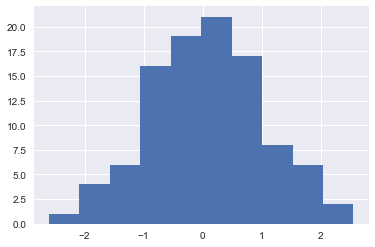

In [9]:
plt.hist(dataset1)

(array([ 11.,   7.,  18.,  12.,  15.,   9.,   3.,   2.,   1.,   2.]),
 array([-1.67336311, -1.19926241, -0.72516171, -0.25106101,  0.22303969,
         0.69714039,  1.17124109,  1.64534179,  2.11944249,  2.59354319,
         3.06764388]),
 <a list of 10 Patch objects>)

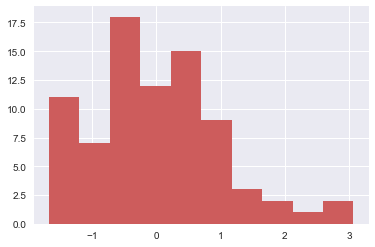

In [11]:
dataset2 = randn(80)
plt.hist(dataset2,color='indianred')

(array([ 0.26365707,  0.31638848,  0.21092565,  0.15819424,  0.31638848,
         0.63277696,  0.31638848,  0.31638848,  0.31638848,  0.47458272,
         0.21092565,  0.26365707,  0.10546283,  0.05273141,  0.05273141,
         0.05273141,  0.        ,  0.05273141,  0.        ,  0.10546283]),
 array([-1.67336311, -1.43631276, -1.19926241, -0.96221206, -0.72516171,
        -0.48811136, -0.25106101, -0.01401066,  0.22303969,  0.46009004,
         0.69714039,  0.93419074,  1.17124109,  1.40829144,  1.64534179,
         1.88239214,  2.11944249,  2.35649284,  2.59354319,  2.83059354,
         3.06764388]),
 <a list of 20 Patch objects>)

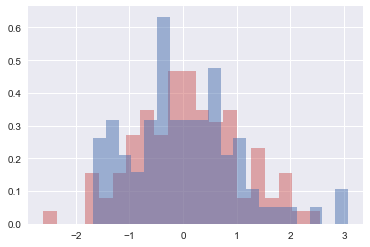

In [13]:
plt.hist(dataset1,normed=True,color='indianred',alpha=0.5,bins=20)
plt.hist(dataset2,normed=True,alpha=0.5,bins=20)

In [14]:
data1 = randn(1000)
data2= randn(1000)

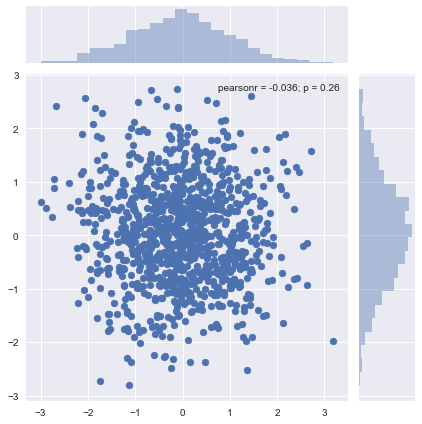

In [15]:
sns.jointplot(data1,data2)

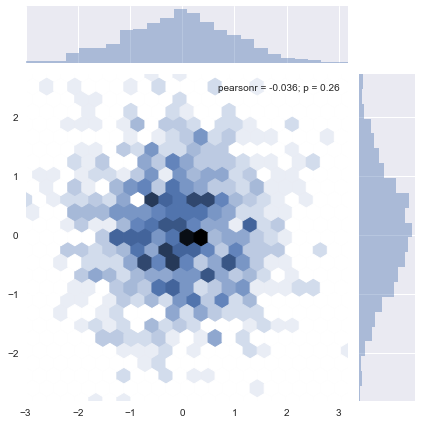

In [16]:
sns.jointplot(data1,data2,kind='hex')

# Kernel_Density_Estimation_Plot

In [2]:
# manule 
dataset = randn(25)

(0, 1)

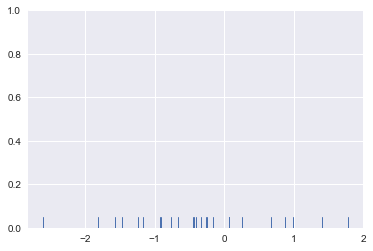

In [4]:
sns.rugplot(dataset)
plt.ylim(0,1)

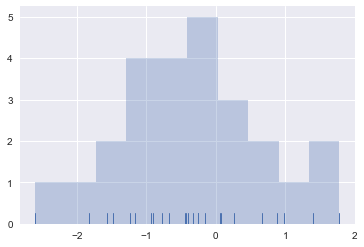

In [6]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

(0, 1)

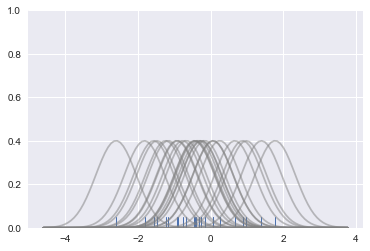

In [7]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min,x_max,100)

#estimation equation
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    #creat a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    # Scale for ploting 
    kernel = kernel/kernel.max()
    kernel = kernel* 0.4
    
    plt.plot(x_axis,kernel, color='grey',alpha=0.5)

plt.ylim(0,1)

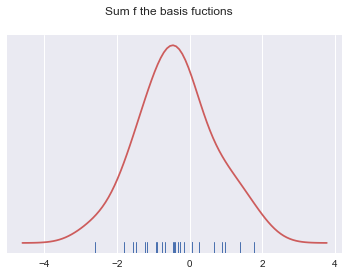

In [8]:
sum_0f_kde = np.sum(kernel_list,axis=0)

fig = plt.plot(x_axis,sum_0f_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum f the basis fuctions")

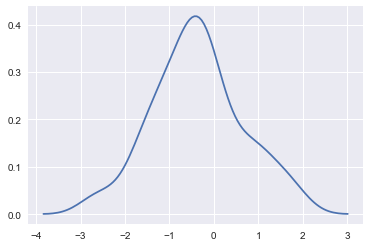

In [9]:
# in seaborn
sns.kdeplot(dataset)

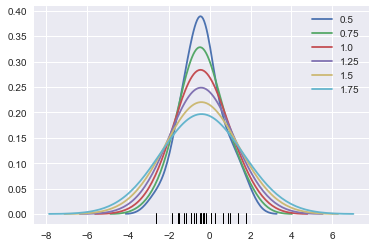

In [10]:
sns.rugplot(dataset,color='k')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)

In [11]:
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

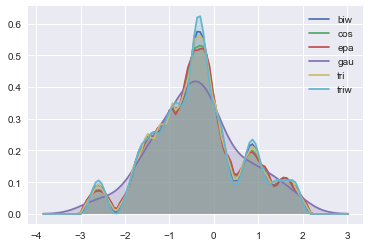

In [13]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset,kernel = kern,label=kern, shade=True)

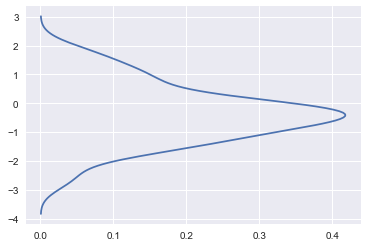

In [14]:
sns.kdeplot(dataset,vertical=True)

In [15]:
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

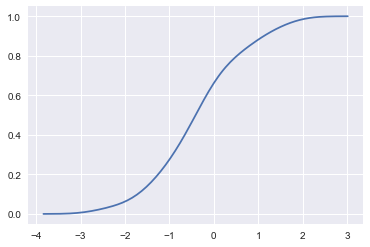

In [16]:
sns.kdeplot(dataset,cumulative=True)

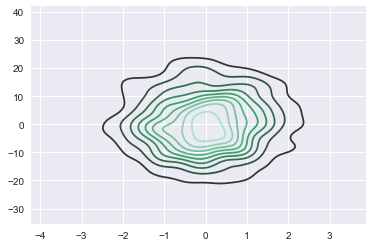

In [17]:
mean= [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)

dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

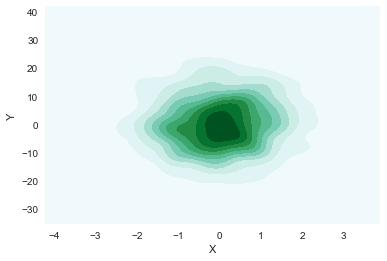

In [19]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

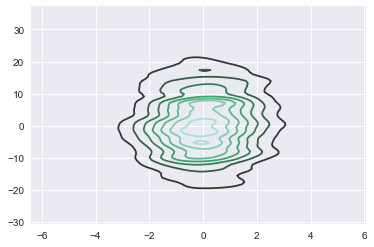

In [20]:
sns.kdeplot(dframe,bw=1)

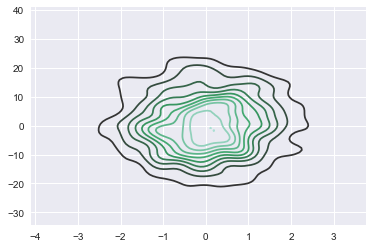

In [21]:
sns.kdeplot(dframe,bw='silverman')

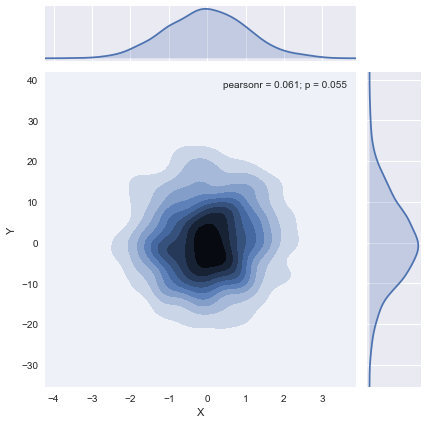

In [22]:
sns.jointplot('X','Y',dframe,kind='kde')

# Combining_Plot_Styles

In [26]:
dataset = randn(100)

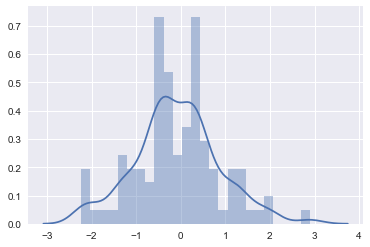

In [27]:
sns.distplot(dataset,bins=25)

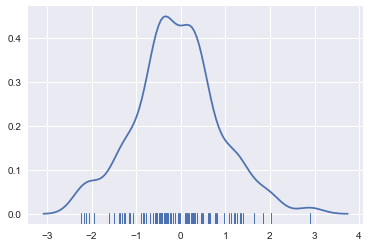

In [28]:
sns.distplot(dataset,bins=25,rug=True,hist=False)

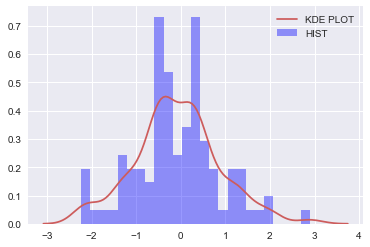

In [29]:
sns.distplot(dataset,bins=25,
            kde_kws={'color':'indianred','label':'KDE PLOT'},
            hist_kws={'color':'blue','label':'HIST'})

In [31]:
from pandas import Series
ser1= Series(dataset,name='My_data')
ser1

0     0.158820
1     0.326500
2     0.316839
3     0.127900
4    -1.935851
5     1.256371
6     0.259392
7    -0.427237
8     1.356928
9     2.894662
10   -0.581755
11   -1.264914
12    0.095523
13    0.280136
14    0.637161
15    1.184691
16   -1.060983
17   -1.140430
18   -0.626254
19   -0.532007
20   -0.890603
21   -0.377410
22   -1.493797
23   -1.354773
24    0.600010
25    0.313543
26    1.647723
27    0.247840
28   -0.168065
29   -0.460555
        ...   
70    0.183026
71   -0.028621
72   -0.182556
73   -2.050111
74   -0.819664
75   -0.784896
76    1.211414
77   -0.058969
78   -0.437745
79    0.232389
80   -2.162225
81    1.074946
82   -0.252999
83    0.281333
84   -0.335348
85   -1.258973
86    0.977909
87   -0.490964
88   -0.376305
89    0.143529
90    0.802103
91   -0.537828
92   -0.307935
93    0.105827
94    0.780111
95    0.662290
96   -0.452839
97    0.135867
98   -2.229922
99    0.318169
Name: My_data, Length: 100, dtype: float64

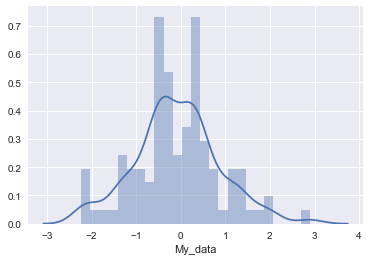

In [32]:
sns.distplot(ser1,bins=25)

# Box_and_Violin_Plots

In [33]:
url = 'http://en.wikipedia.org/wiki/Box_plot#mediaviewer/File:Boxplot_vs_PDF.svg'

In [34]:
data1 = randn(100)
data2 = randn(100)

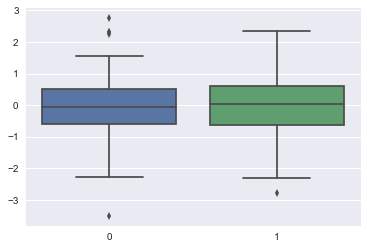

In [36]:
sns.boxplot(data=[data1,data2])

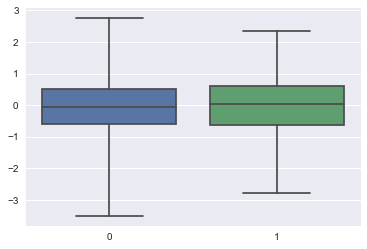

In [37]:
sns.boxplot(data=[data1,data2],whis=np.inf)

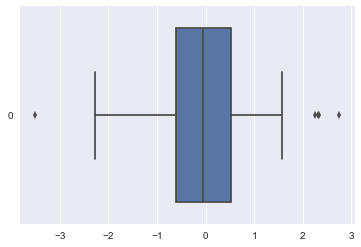

In [57]:
sns.boxplot(data=data1,orient="h")

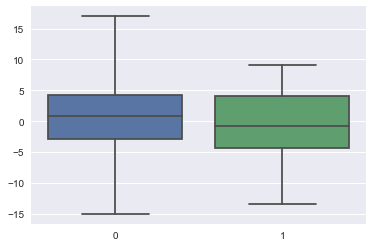

In [60]:
# Normal Dist
data1 = stats.norm(0,5).rvs(100)

# Two gamma dist. Concatenated together
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                       -1*stats.gamma(5).rvs(50)])

# Box plot both data1 and data2
sns.boxplot(data=[data1,data2],whis=np.inf)

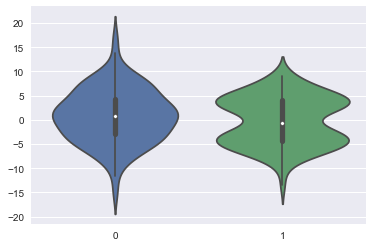

In [62]:
sns.violinplot(data=[data1,data2])

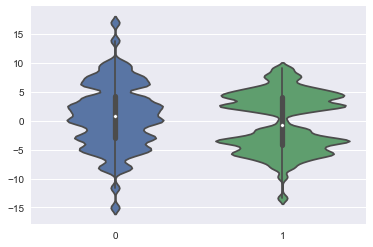

In [64]:
sns.violinplot(data=[data1,data2], bw = 0.1)

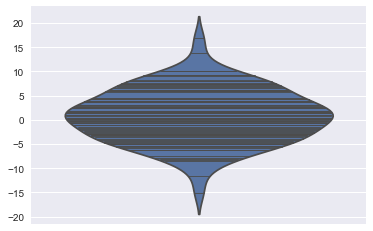

In [67]:
sns.violinplot(data1,inner='stick',orient="v")

# Regresson_plots 

In [68]:
tips = sns.load_dataset('tips')

In [69]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


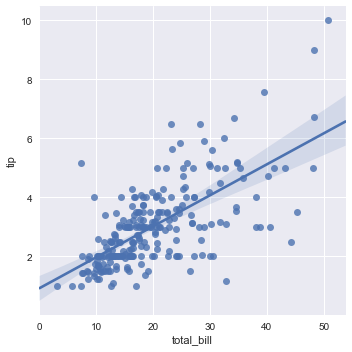

In [70]:
sns.lmplot('total_bill','tip',tips)

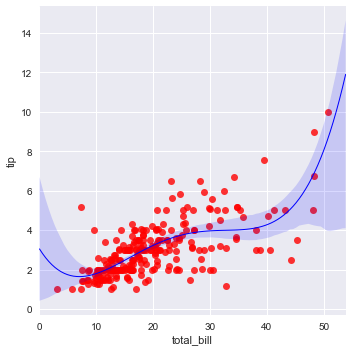

In [73]:
sns.lmplot('total_bill','tip',tips,order=4,
         scatter_kws={'marker':'o','color':'red'},
         line_kws={'linewidth':1,'color':'blue'})

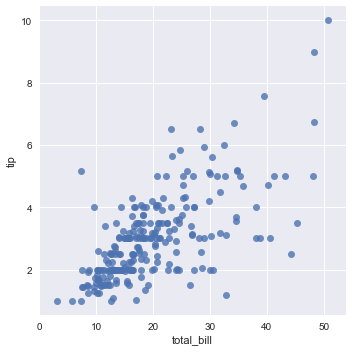

In [75]:
sns.lmplot('total_bill','tip',tips,fit_reg=False)

In [76]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
tips['tip_pect']=100*(tips['tip']/tips['total_bill'])

In [78]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pect
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


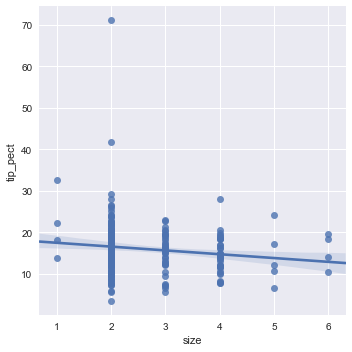

In [79]:
sns.lmplot('size','tip_pect',tips)

In [80]:
url = 'http://en.wikipedia.org/wiki/Jitter'

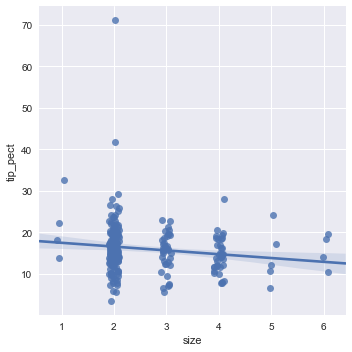

In [85]:
sns.lmplot('size','tip_pect',tips,x_jitter=0.1)

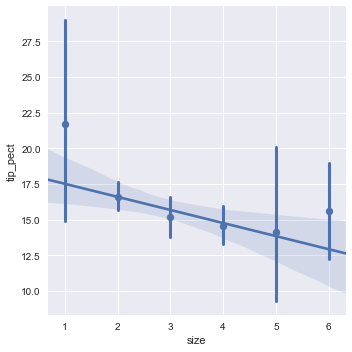

In [86]:
sns.lmplot('size','tip_pect',tips,x_estimator=np.mean)

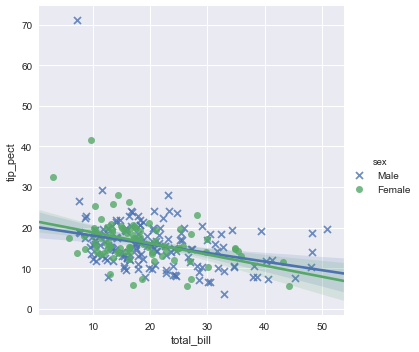

In [87]:
sns.lmplot('total_bill','tip_pect',tips,hue='sex',markers=['x','o'])

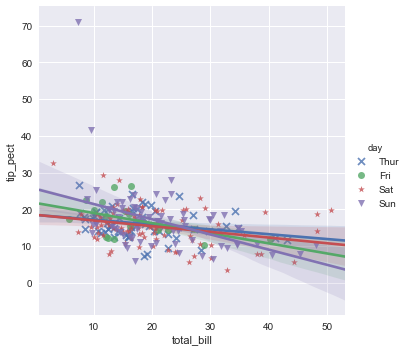

In [92]:
sns.lmplot('total_bill','tip_pect',tips,hue='day',markers=['x','o','*','v'])

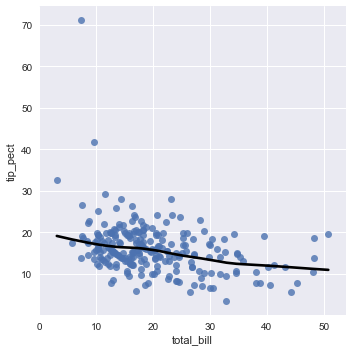

In [94]:
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot('total_bill','tip_pect',tips,lowess=True,line_kws={'color':'k'})

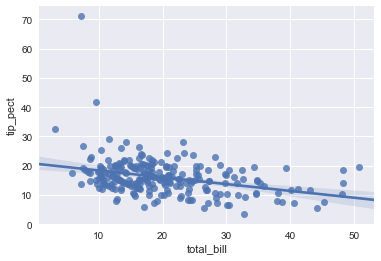

In [95]:
sns.regplot('total_bill','tip_pect',tips)

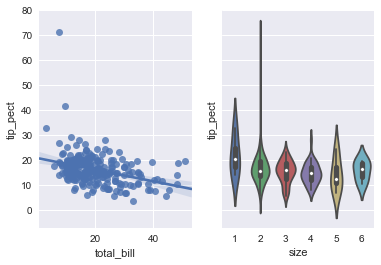

In [120]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey=True)

sns.regplot('total_bill','tip_pect',tips,ax=axis1)
sns.violinplot(tips['size'],tips['tip_pect'],ax=axis2)

#  Heatmaps_and_clustered_Matrices

In [121]:
flight_dframe = sns.load_dataset('flights')

In [122]:
flight_dframe.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [123]:
flight_dframe = flight_dframe.pivot('month','year','passengers')

In [124]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


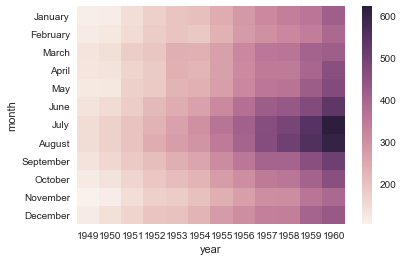

In [126]:
sns.heatmap(flight_dframe)

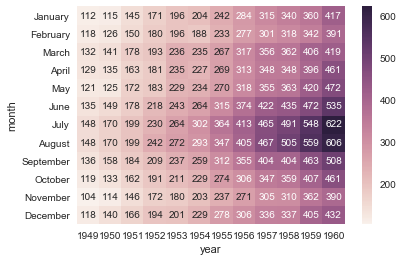

In [127]:
sns.heatmap(flight_dframe,annot=True,fmt='d')

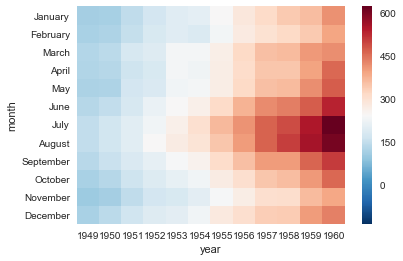

In [128]:
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955])

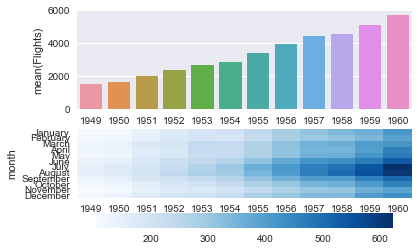

In [130]:
f,(axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

sns.barplot('Year',y='Flights',data=year_dframe,ax=axis1)
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={'orientation':'horizontal'})

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


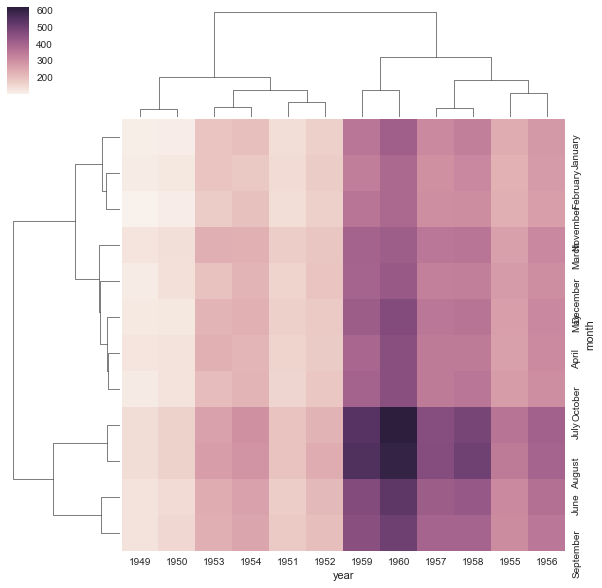

In [132]:
sns.clustermap(flight_dframe)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


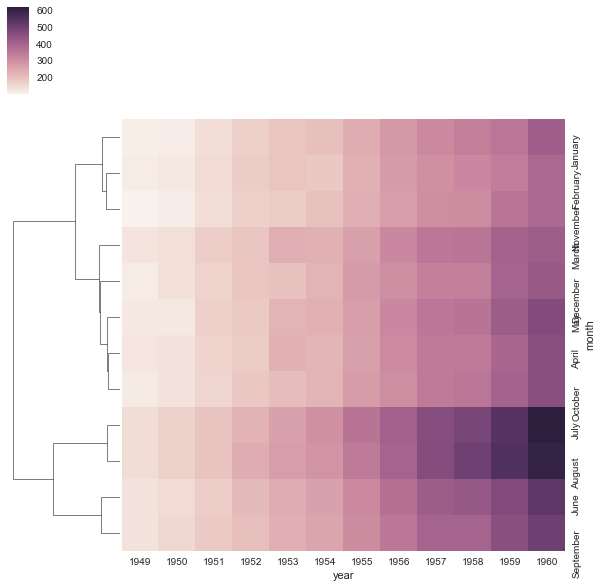

In [133]:
sns.clustermap(flight_dframe,col_cluster=False)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


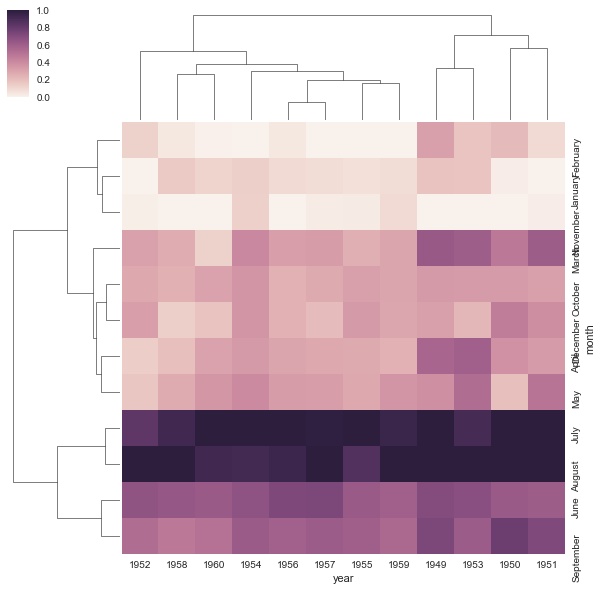

In [134]:
sns.clustermap(flight_dframe,standard_scale=1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


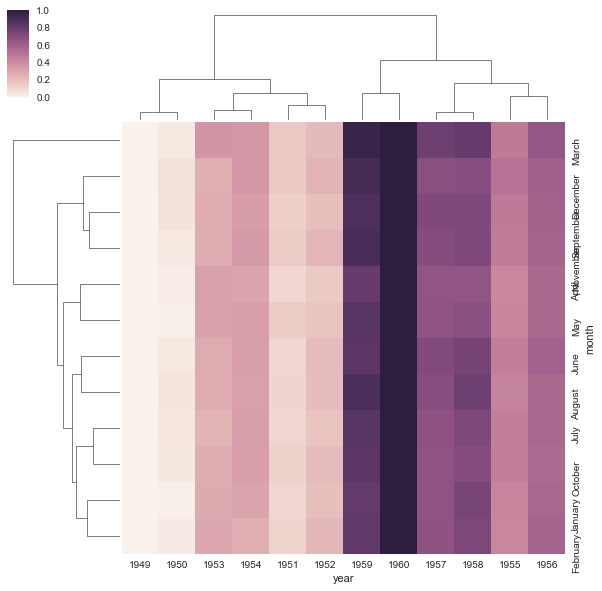

In [135]:
sns.clustermap(flight_dframe,standard_scale=0)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


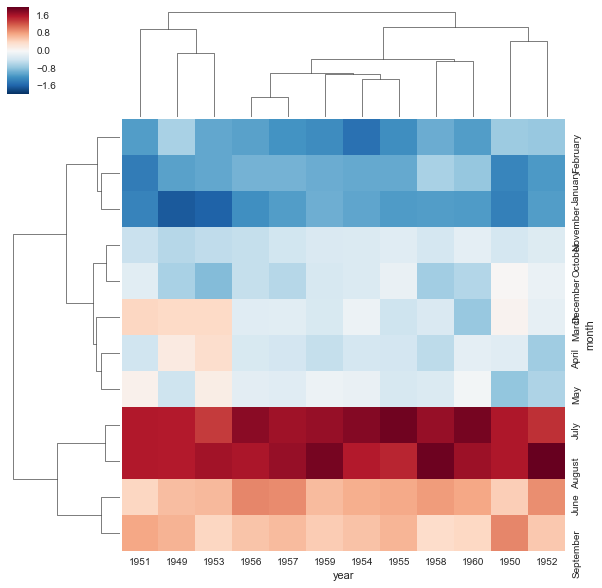

In [136]:
sns.clustermap(flight_dframe,z_score=1)